# Basic use

This Jupyter notebook gives an overview of the Python package [gravis](https://pypi.org/project/gravis). The .ipynb file can be found [here](https://github.com/robert-haas/gravis/tree/master/examples).

In [1]:
import gravis as gv

## Create a graph

### 1) String or dictionary in gJGF

This package uses a custom format called [gravis JSON graph format (gJGF)](../../rst/format_specification.html). The following example encodes a simple but well-known graph ([en](https://en.wikipedia.org/wiki/Eulerian_path), [de](https://de.wikipedia.org/wiki/Haus_vom_Nikolaus)) as dictionary in gJGF.

In [2]:
graph1 = {
    'graph':{
        'directed': True,
        'metadata': {
            'arrow_size': 5,
            'background_color': 'black',
            'edge_size': 3,
            'edge_label_size': 14,
            'edge_label_color': 'white',
            'node_size': 15,
            'node_color': 'white',
        },
        'nodes': {
            1: {'metadata': {'shape': 'rectangle', 'y': 200}},
            2: {},
            3: {},
            4: {'metadata': {'shape': 'rectangle', 'y': 200}},
            5: {'metadata': {'shape': 'hexagon', 'y': 0}},
        },
        'edges': [
            {'source': 1, 'target': 2, 'metadata': {'color': '#d73027', 'de': 'Das',   'en': 'This'}},
            {'source': 2, 'target': 3, 'metadata': {'color': '#f46d43', 'de': 'ist',   'en': 'is'}},
            {'source': 3, 'target': 1, 'metadata': {'color': '#fdae61', 'de': 'das',   'en': 'the'}},
            {'source': 1, 'target': 4, 'metadata': {'color': '#fee08b', 'de': 'Haus',  'en': 'house'}},
            {'source': 4, 'target': 3, 'metadata': {'color': '#d9ef8b', 'de': 'vom',   'en': 'of'}},
            {'source': 3, 'target': 5, 'metadata': {'color': '#a6d96a', 'de': 'Ni-.',  'en': 'San-'}},
            {'source': 5, 'target': 2, 'metadata': {'color': '#66bd63', 'de': 'ko-',   'en': 'ta'}},
            {'source': 2, 'target': 4, 'metadata': {'color': '#1a9850', 'de': 'laus.', 'en': 'Claus.'}},
        ],
    }
}

### 2) Graph object from external library

This package provides support for recognizing graph objects from external libraries. It also allows to add graph annotations, which are mapped to visual elements and their appearance.

The following example shows how to create a graph object with [NetworkX](https://networkx.org) and add node sizes and colors coming from [centrality calculation](https://networkx.org/documentation/stable/reference/algorithms/centrality.html) and [community detection](https://networkx.org/documentation/stable/reference/algorithms/community.html).

In [3]:
import networkx as nx

graph2 = nx.les_miserables_graph()

# Centrality calculation
centrality = nx.algorithms.degree_centrality(graph2)

# Community detection
communities = nx.algorithms.community.greedy_modularity_communities(graph2)

# Assignment of node sizes
nx.set_node_attributes(graph2, centrality, 'size')

# Assignment of node colors
colors = ['red', 'blue', 'green', 'orange', 'pink']
for community, color in zip(communities, colors):
    for node in community:
        graph2.nodes[node]['color'] = color

The following example shows how to create a graph object with [igraph](https://igraph.org) and add node sizes and edge sizes coming from [node betweenness](https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#betweenness) and [edge betweenness](https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#edge_betweenness) calculation.

In [4]:
import igraph as ig

graph3 = ig.Graph.Lattice(dim=[5, 5, 2], circular=False)

# Betweenness calculation
node_betweenness = graph3.betweenness()
edge_betweenness = graph3.edge_betweenness()

# Assignment of node and edge sizes
graph3.vs['size'] = [val / 5.0 for val in node_betweenness]
graph3.es['size'] = edge_betweenness

## Plot a graph

A graph visualization can be embedded inside an output cell of a Jupyter notebook.

In [5]:
gv.vis(graph1, show_node_label=False, show_edge_label=True, edge_label_data_source='en')

In [6]:
gv.d3(graph2, use_node_size_normalization=True, node_size_normalization_max=30,
      use_edge_size_normalization=True, edge_size_data_source='weight', edge_curvature=0.3)

In [7]:
gv.three(graph3, use_edge_size_normalization=True)

A graph visualization can also be displayed in a new browser window or tab.

In [8]:
fig = gv.vis(graph1, show_node_label=False, show_edge_label=True, edge_label_data_source='en')
fig.display()

## Export a graph

### 1) As HTML file

A graph visualization can be exported as standalone HTML file.

In [9]:
fig = gv.d3(graph2, use_node_size_normalization=True, node_size_normalization_max=30,
            use_edge_size_normalization=True, edge_size_data_source='weight', edge_curvature=0.3,
            zoom_factor=0.6)
fig.export_html('graph2.html')

### 2) As PNG, JPG or SVG file with static plot

A graph visualization can be exported as static image in JPG, PNG or SVG format. Behind the scences, this is achieved by creating a HTML visualization, opening it in a headless browser with [Selenium](https://selenium-python.readthedocs.io/) and capturing a picture with the same JPG, PNG or SVG button that a user can click when viewing a HTML visualization. As such it takes a few seconds and requires some optional dependencies to be installed (Selenium, webbrowser and webdriver).

In [10]:
fig.export_jpg('graph2.jpg')

In [11]:
fig.export_png('graph2.png')

In [12]:
fig.export_svg('graph2.svg')

A Jupyter notebook can also display images in JPG, PNG or SVG format directly in output cells.

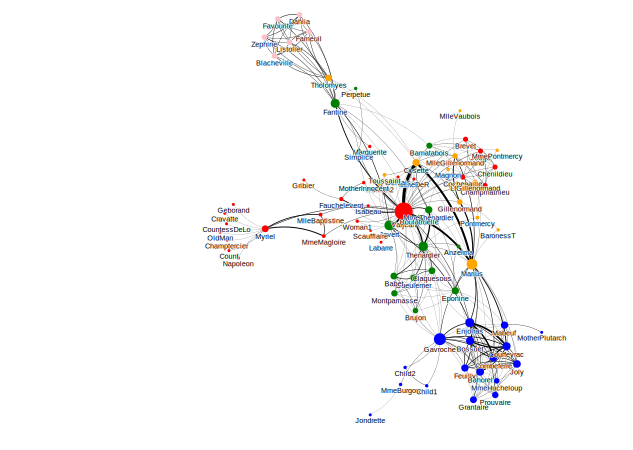

In [13]:
import IPython

svg_text = fig.to_svg()
IPython.display.SVG(svg_text)

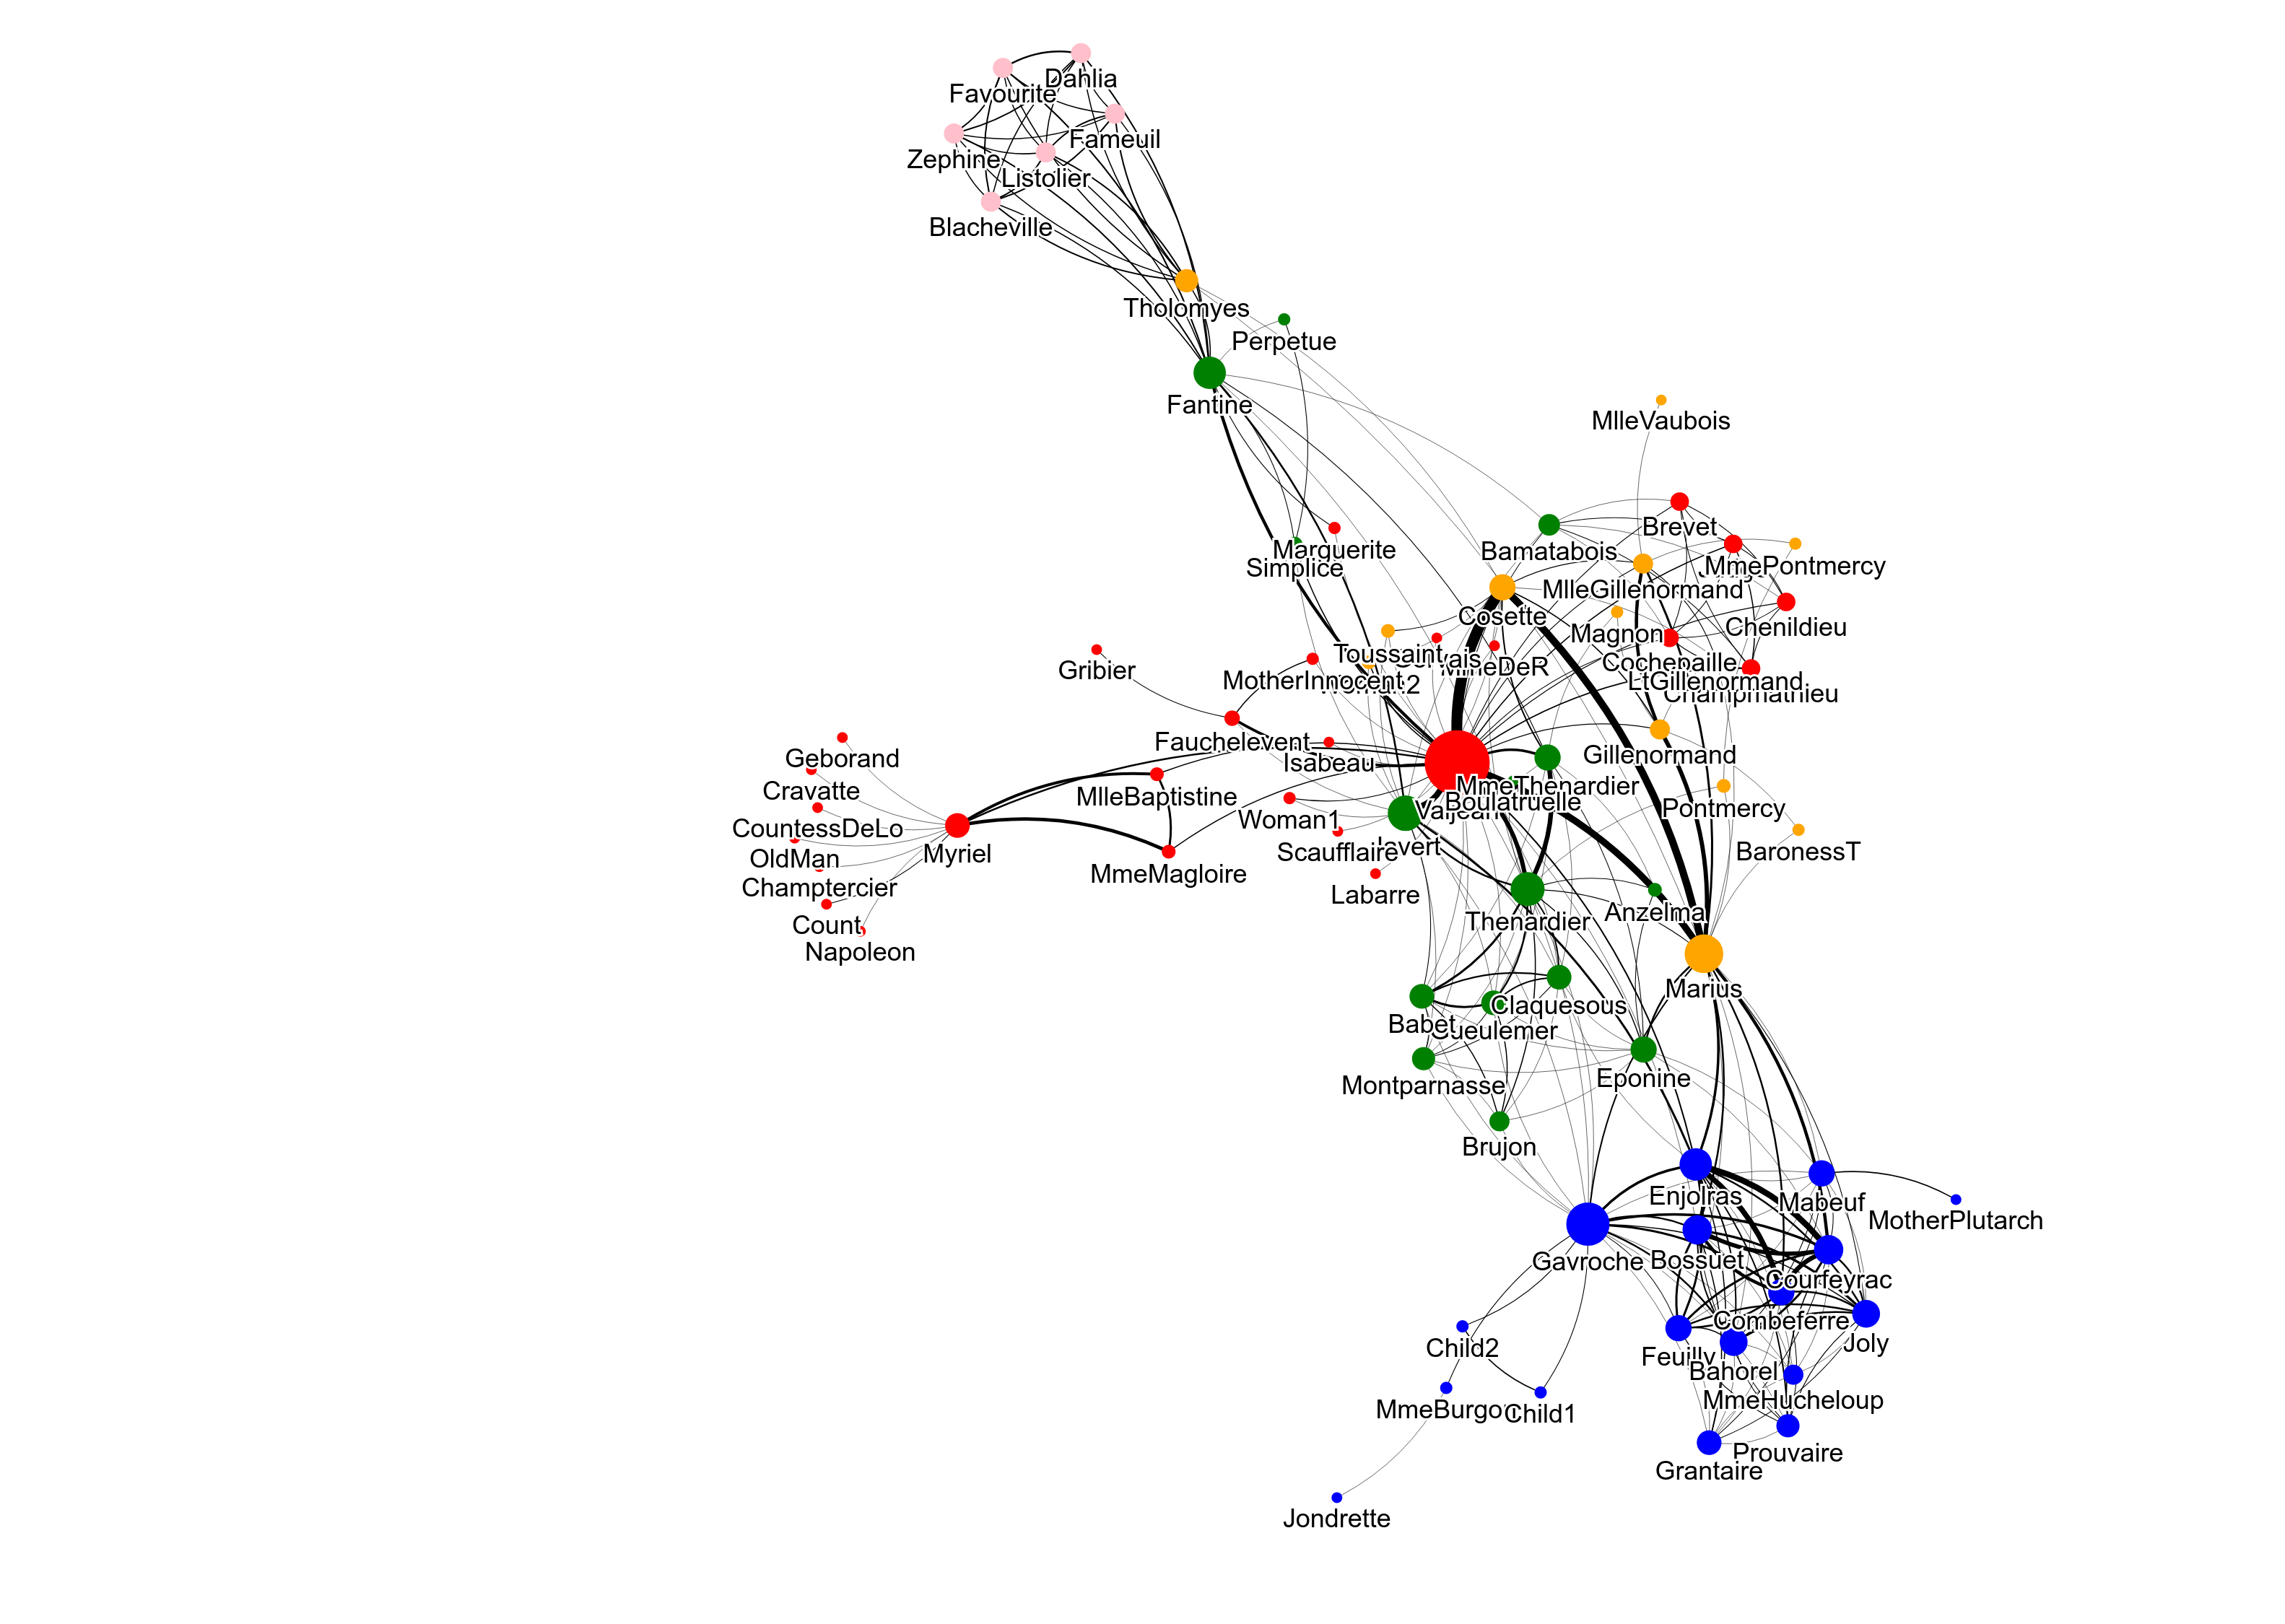

In [14]:
jpg_data = fig.to_jpg()
IPython.display.Image(jpg_data)

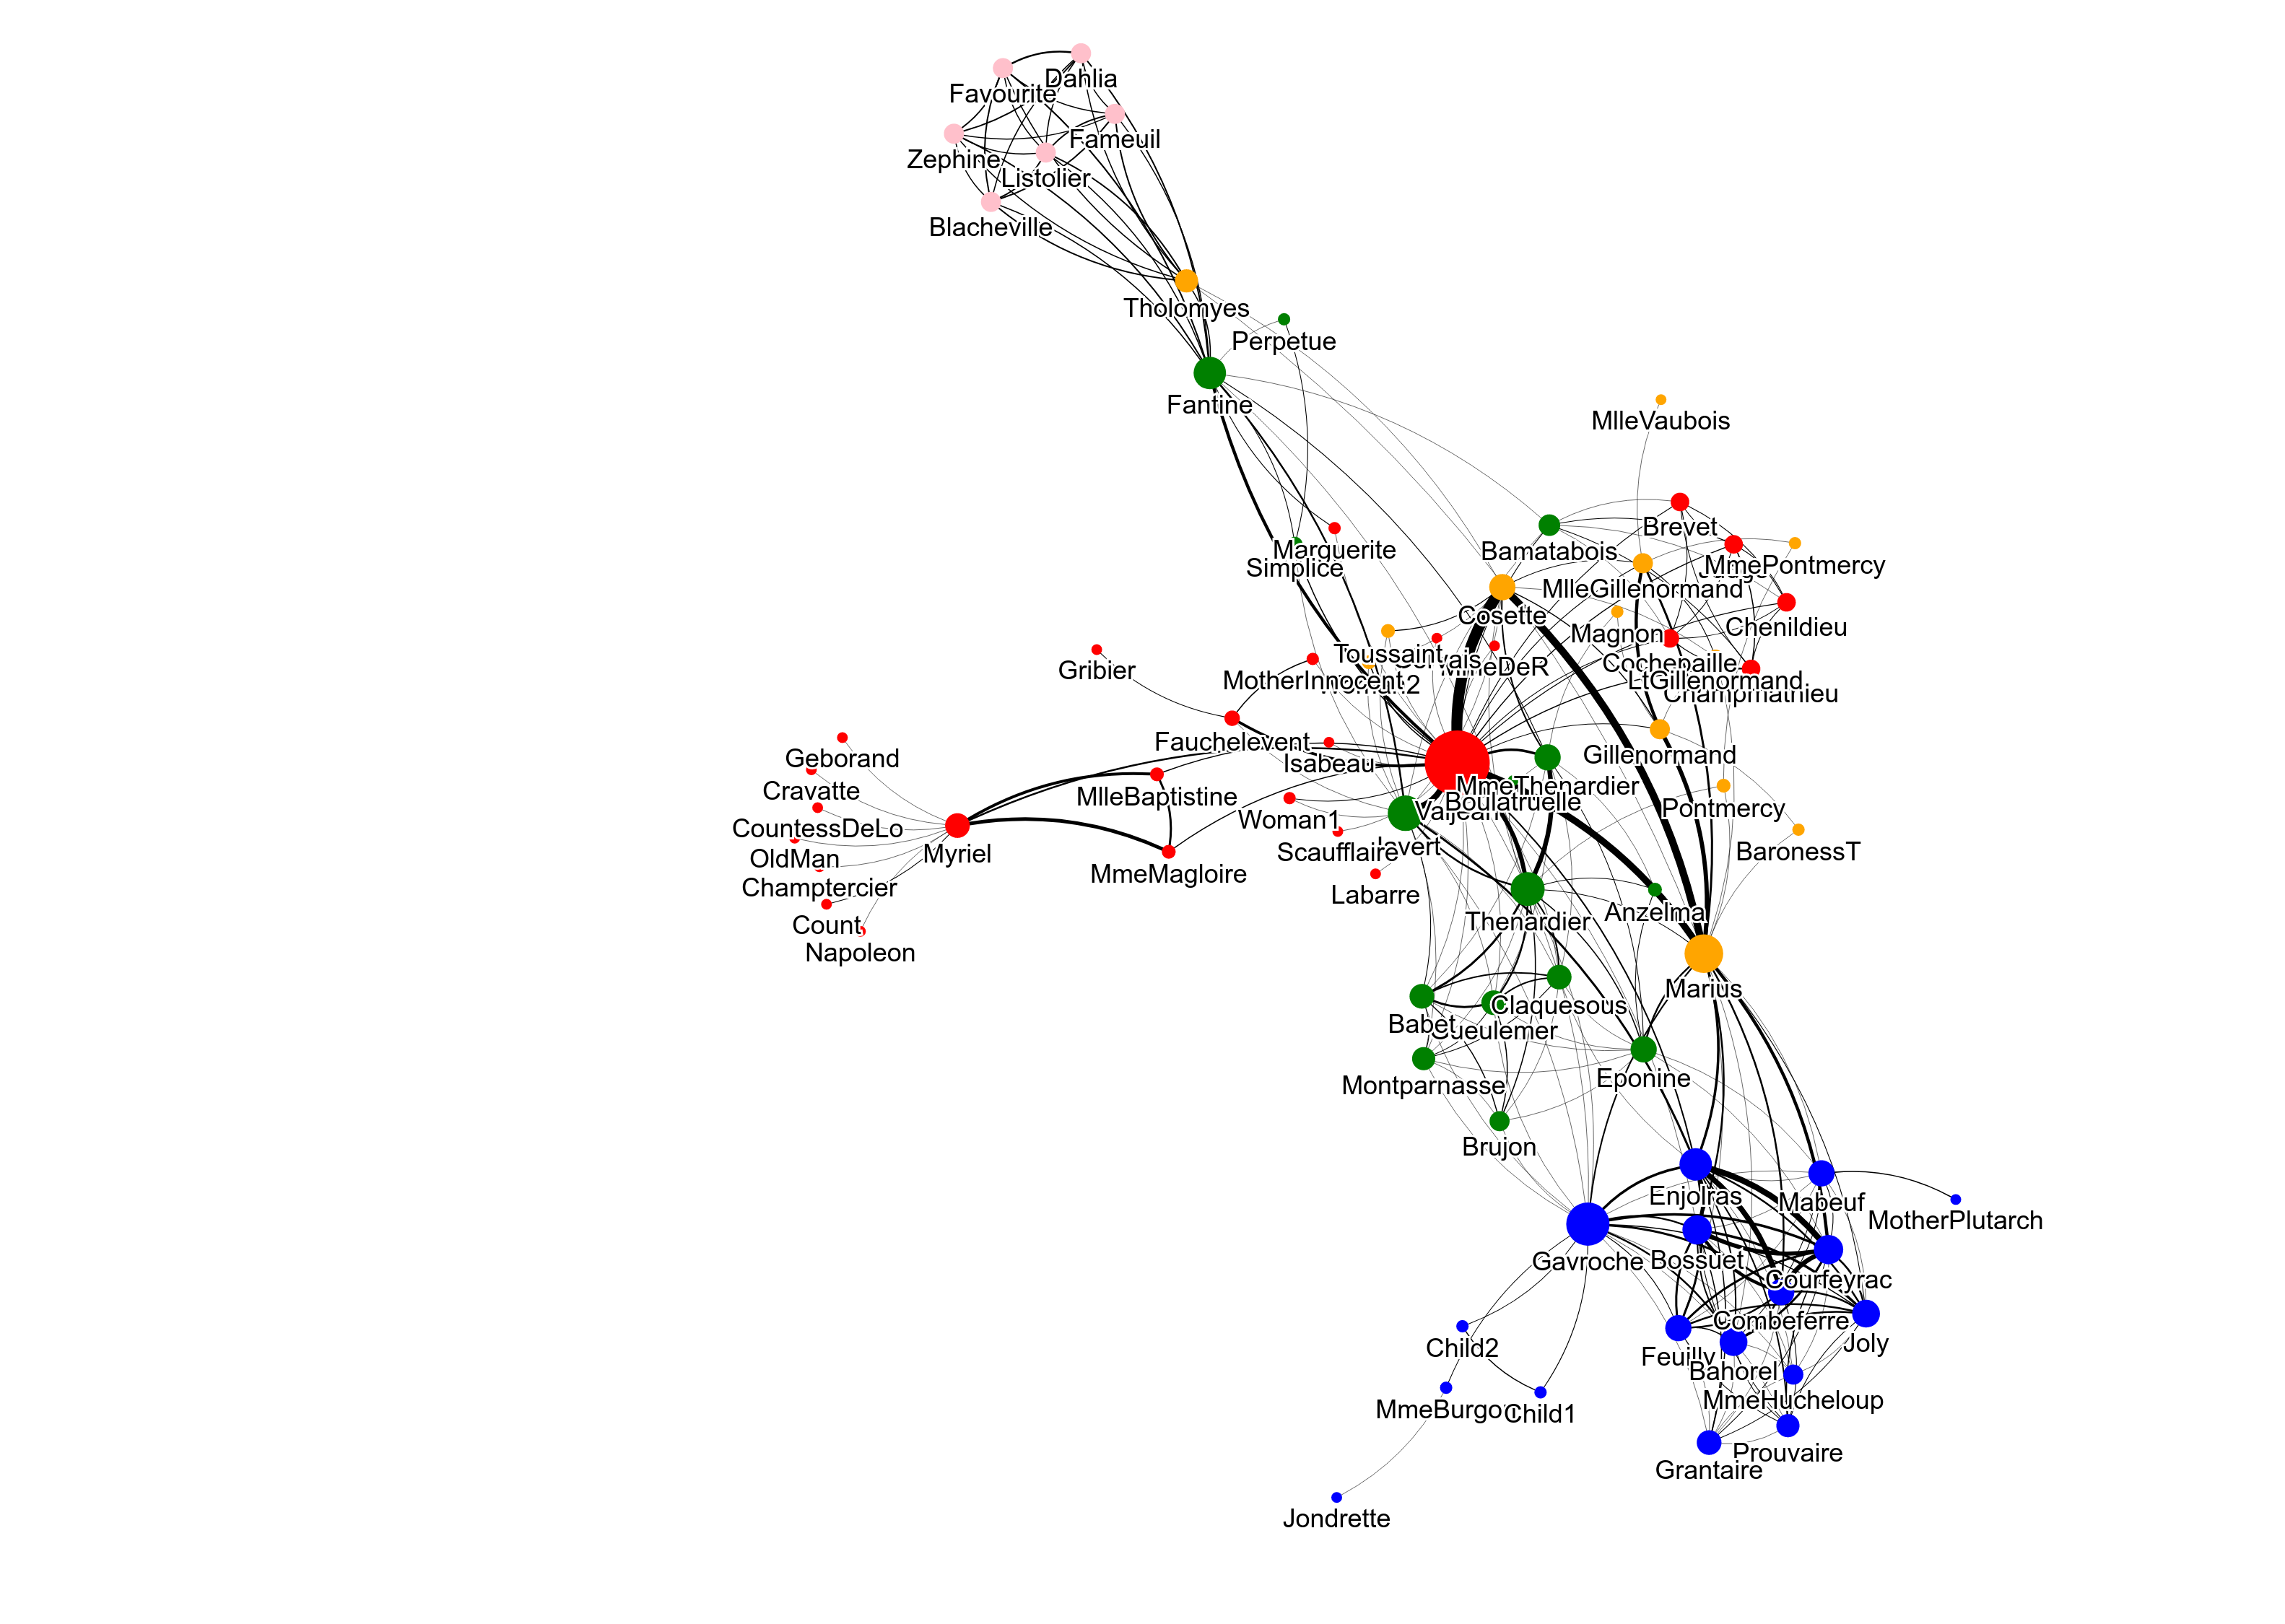

In [15]:
png_data = fig.to_png()
IPython.display.Image(png_data)